In [11]:
import pandas as pd
import geopandas

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

from dbconf import get_engine

In [13]:
gdf = geopandas.read_postgis("SELECT * FROM shape WHERE type = 'region'", con=get_engine(), geom_col='geometry')

In [41]:
region_names_db = gdf['name'].unique()
name_to_id = dict(zip(gdf.name, gdf.id))

In [52]:
df = pd.read_csv('../input/data/fao_drought/ASI_Dekad_Season1_data.csv', parse_dates=['Date'])

In [53]:
df

,Indicator,Country,ADM1_CODE,Province,Land_Type,Date,Data,Year,Month,Dekad,Unit,Source
0,Agricultural Stress Index (ASI),United Republic of Tanzania,48357,Arusha,Crop Area,1984-03-11,0.000,1984,3,2,% of area with Mean VHI below 35,FAO-ASIS
1,Agricultural Stress Index (ASI),United Republic of Tanzania,48357,Arusha,Crop Area,1984-03-21,13.115,1984,3,3,% of area with Mean VHI below 35,FAO-ASIS
2,Agricultural Stress Index (ASI),United Republic of Tanzania,48357,Arusha,Crop Area,1984-04-01,15.289,1984,4,1,% of area with Mean VHI below 35,FAO-ASIS
3,Agricultural Stress Index (ASI),United Republic of Tanzania,48357,Arusha,Crop Area,1984-04-11,13.793,1984,4,2,% of area with Mean VHI below 35,FAO-ASIS
4,Agricultural Stress Index (ASI),United Republic of Tanzania,48357,Arusha,Crop Area,1984-04-21,2.642,1984,4,3,% of area with Mean VHI below 35,FAO-ASIS
...,...,...,...,...,...,...,...,...,...,...,...,...
33672,Agricultural Stress Index (ASI),United Republic of Tanzania,48375,Ruvuma,Crop Area,2022-06-11,29.461,2022,6,2,% of area with Mean VHI below 35,FAO-ASIS
33673,Agricultural Stress Index (ASI),United Republic of Tanzania,115010,Simiyu,Crop Area,2022-06-11,0.000,2022,6,2,% of area with Mean VHI below 35,FAO-ASIS
33674,Agricultural Stress Index (ASI),United Republic of Tanzania,48377,Singida,Crop Area,2022-06-11,100.000,2022,6,2,% of area with Mean VHI below 35,FAO-ASIS
33675,Agricultural Stress Index (ASI),United Republic of Tanzania,48380,Tabora,Crop Area,2022-06-11,100.000,2022,6,2,% of area with Mean VHI below 35,FAO-ASIS


In [51]:
dfx = df[df['Province'] == 'Iringa']

<AxesSubplot:xlabel='Date'>

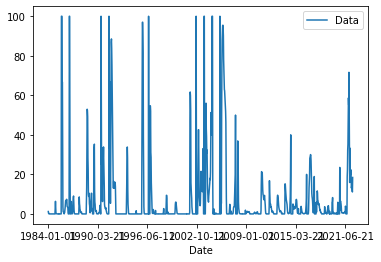

In [54]:
dfx.plot(x='Date', y='Data')

In [17]:
fao_names = df['Province'].unique()

In [22]:
for name in fao_names:
    if name not in region_names_db:
        print(name)

In [23]:
df2 = df[['Province', 'Date', 'Data']]

In [29]:
df3= df2.rename(columns={'Province': 'name', 'Date': 'date', 'Data': 'fao_drought'})

In [42]:
def get_id_for_name(name):
    return name_to_id[name]

In [45]:
df3['shape_id'] = df3['name'].apply(get_id_for_name)

In [46]:
df3

,name,date,fao_drought,shape_id
0,Arusha,1984-03-11,0.000,2
1,Arusha,1984-03-21,13.115,2
2,Arusha,1984-04-01,15.289,2
3,Arusha,1984-04-11,13.793,2
4,Arusha,1984-04-21,2.642,2
...,...,...,...,...
33672,Ruvuma,2022-06-11,29.461,10
33673,Simiyu,2022-06-11,0.000,24
33674,Singida,2022-06-11,100.000,13
33675,Tabora,2022-06-11,100.000,14


In [49]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33677 entries, 0 to 33676
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         33677 non-null  object 
 1   date         33677 non-null  object 
 2   fao_drought  33677 non-null  float64
 3   id           33677 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB
